In [2]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
from google.colab import drive
import re

In [3]:
from google.colab import auth
auth.authenticate_user()  # must authenticate

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# @title Getting the data
project_location_file_path = '/content/drive/MyDrive/lihtc/project_location.json'
df = pd.read_json(project_location_file_path)
df = df[['file_id', 'Site Geo Coordinates']]
df

,file_id,Site Geo Coordinates
0,2015-509wessblckgoracore.xlsx,"40.7127837, -74.00594130000002 and 32.0661265,..."
1,2015-508gdnhvptgoracore.xlsx,"33.459332, -82.06387899999999"
2,2015-507cumberldoaksgoracore.xlsx,"30.756864, -81.57105"
3,2015-506remingtongoracore.xlsx,33.781481 -84.476682
4,2015-503grayfldgoracore.xlsx,"Lattitude: 34.0112790, Longitude: -85.2622010"
...,...,...
243,2020-505resatdglsvillecore.xlsx,"33.768296, -84.749054"
244,2020-504mllrycore.xlsx,"33.760859, -84.450486"
245,2020-503madisnreynoldstncore.xlsx,"33.746848, -84.358937"
246,2020-502lkwdcore.xlsx,"33.718845, -84.382285"


In [6]:
# @title making a new row for year
def get_year_by_name(file_name):
  return file_name.split("-")[0]

## Missing data

In [7]:

missing_coord_mask = df['Site Geo Coordinates'].isna()

# Use the boolean mask to filter the DataFrame
missing_coord_df = df[missing_coord_mask]
missing_coord_df

,file_id,Site Geo Coordinates
7,2022-573swtabrngrndcoreapp4pct_full_new.xlsx,NaN
8,2022-567-brentwoodcomcoreapp.xlsx,NaN
9,2022-557getwrcore.xlsx,NaN
10,2022-556avnmtrlcore.xlsx,NaN
11,2022-554mtnwoodscoreapp4pct.xlsx,NaN
12,2022-552cosbyhrcore.xlsx,NaN
13,2022-551arbswellcoreapp.xlsx,NaN
14,2022-546_360peachtree4pct.xlsx,NaN
15,2022-532brkwdhmrvllcore.xlsx,NaN
16,2022-528herprescore.xlsx,NaN


In [8]:
len(missing_coord_df) # 3 files from 2016, where only 1 file actually has no coordinates
                      # and the other two are in a weird format

27

## Cleaning the data

In [9]:
df.dropna(subset=['Site Geo Coordinates'], inplace=True)
df

<ipython-input-9-56aafa59a59c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Site Geo Coordinates'], inplace=True)


,file_id,Site Geo Coordinates
0,2015-509wessblckgoracore.xlsx,"40.7127837, -74.00594130000002 and 32.0661265,..."
1,2015-508gdnhvptgoracore.xlsx,"33.459332, -82.06387899999999"
2,2015-507cumberldoaksgoracore.xlsx,"30.756864, -81.57105"
3,2015-506remingtongoracore.xlsx,33.781481 -84.476682
4,2015-503grayfldgoracore.xlsx,"Lattitude: 34.0112790, Longitude: -85.2622010"
...,...,...
243,2020-505resatdglsvillecore.xlsx,"33.768296, -84.749054"
244,2020-504mllrycore.xlsx,"33.760859, -84.450486"
245,2020-503madisnreynoldstncore.xlsx,"33.746848, -84.358937"
246,2020-502lkwdcore.xlsx,"33.718845, -84.382285"


In [10]:
different_coordinates_df = df[~df['Site Geo Coordinates'].str.contains(r'^-?\d+\.\d+,\s*-?\d+\.\d+$')]
len(different_coordinates_df)

33

In [11]:
# @title Data cleaning other than dropping none
# remove lat long words

# remove degree signs
degree_sign_mask = df['Site Geo Coordinates'].str.contains('°')
rows_with_degree_sign = df[degree_sign_mask]
df.loc[degree_sign_mask, 'Site Geo Coordinates'] = df.loc[degree_sign_mask, 'Site Geo Coordinates'].str.replace('°', '')

# remove tabs and new lines
df['Site Geo Coordinates'] = df['Site Geo Coordinates'].str.replace(r'[\t\n]', '', regex=True)


# replace neg with -
neg_mask = df['Site Geo Coordinates'].str.contains('neg')
rows_with_neg = df[neg_mask]
rows_with_neg
df.loc[neg_mask, 'Site Geo Coordinates'] = df.loc[neg_mask, 'Site Geo Coordinates'].str.replace('neg', '-')

# removing words
df['Site Geo Coordinates'] = df['Site Geo Coordinates'].str.replace(r'[a-zA-Z]+', '', regex=True)
# removing = and : signs
df['Site Geo Coordinates'] = df['Site Geo Coordinates'].str.replace(r'[:=]', '', regex=True)

# replace co-ords with no comas to coords with a comma in the middle:
no_comma_mask = df['Site Geo Coordinates'].str.contains(r'(-?\d+\.\d+)\s+(-?\d+\.\d+)')
df.loc[no_comma_mask, 'Site Geo Coordinates'] = df.loc[no_comma_mask, 'Site Geo Coordinates'].str.replace('(-?\d+\.\d+)\s+(-?\d+\.\d+)', r'\1, \2', regex=True)

# Remove leading and trailing spaces from the 'Coordinates' column
df['Site Geo Coordinates'] = df['Site Geo Coordinates'].str.strip()

<ipython-input-11-efd5ea47cb6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[degree_sign_mask, 'Site Geo Coordinates'] = df.loc[degree_sign_mask, 'Site Geo Coordinates'].str.replace('°', '')
<ipython-input-11-efd5ea47cb6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Site Geo Coordinates'] = df['Site Geo Coordinates'].str.replace(r'[\t\n]', '', regex=True)
<ipython-input-11-efd5ea47cb6e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [12]:
# @title Check if there is a hour, min, sec pattern match and convert it to decimal

# convert coordinates from minute, second format to decimal format
def minute_second_to_decimal(degrees, minutes, seconds):
    degrees = float(degrees)
    minutes = float(minutes) / 60
    seconds = float(seconds) / 3600
    decimal_coord = degrees + minutes + seconds
    return decimal_coord


# Patterns for matching coordinates
patterns = [
    r'(\d+)\.(\d+)\.(\d+\.\d+)\s*,\s*(\d+)\.(\d+)\.(\d+\.\d+)',        # 33.01.52.9, 85.01.01.5
    r'(\d+)\*(\d+)\'(\d+\.\d+)\"\s*,\s*(\d+)\*(\d+)\'(\d+\.\d+)\"',    # 32*28'23.44", 32*28'23.44"
    r'(\d+)\s(\d+)\'(\d+\.\d+)\"\s*,\s*(\d+)\s(\d+)\'(\d+\.\d+)\"',    # 33 59'04.55", 33 59'04.55"
    r'(\d+)\*(\d+)\'(\d+\.\d+)\'\s*,\s*(\d+)\*(\d+)\'(\d+\.\d+)\'',    # 32*25'52.24', 32*25'52.24'
]
def convert_to_decimal(coord):
    for pattern in patterns:
        match = re.match(pattern, coord)
        if match:
            lat_deg, lat_min, lat_sec, lon_deg, lon_min, lon_sec= match.groups()
            latitude = minute_second_to_decimal(lat_deg, lat_min, lat_sec)
            longitude = minute_second_to_decimal(lon_deg, lon_min, lon_sec)
            return str(latitude) + ', ' + str(longitude)
    return None

# Create a mask for matching rows
mask = df['Site Geo Coordinates'].str.match('|'.join(patterns))
# Apply the function to convert coordinates in the matching rows
df.loc[mask, 'Site Geo Coordinates'] = df.loc[mask, 'Site Geo Coordinates'].apply(convert_to_decimal)

In [13]:
different_coordinates_df = df[~df['Site Geo Coordinates'].str.contains(r'^-?\d+\.\d+\s*,\s*-?\d+\.\d+$')]
len(different_coordinates_df)

16

In [14]:
different_coordinates_df

,file_id,Site Geo Coordinates
0,2015-509wessblckgoracore.xlsx,"40.7127837, -74.00594130000002, 32.0661265, -8..."
36,2016-519newvlgsconleyhncoregora.xlsx,"33*39'00.8, 84*21'34.0*"
37,2016-518maggiecapitolcoregora.xlsx,"33.764367 / 33.728755, -84.374318 / -84.387620"
38,2016-517prkwstcoregora.xlsx,"3350'19.09"", 84 0'39.52"""
47,2016-508capitolvwgtwycoregora.xlsx,"33.717639, -84.42391,964"
49,2016-506wilsonradcoregora.xlsx,32*28'23.44* 88*24'54.86*
51,2016-504knightradcoregora.xlsx,32*25'52.24 84*56'29.94
52,2016-503farleyradcoregora.xlsx,32*27'29.83* 84*57'52.66*
103,2019-512hartlandstncore.xlsx,"3341'54.3"", 8424'41.1"""
134,2018-535hertgetwnhmcoreapp.xlsx,","


In [15]:
df = df[df['Site Geo Coordinates'].str.contains(r'^-?\d+\.\d+\s*,\s*-?\d+\.\d+$')]

# Plotting the data

## 1. Using Geopandas

In [16]:
split_coordinates = df['Site Geo Coordinates'].str.split(', ', n=1, expand=True)
df['Latitude'] = split_coordinates[0]
df['Longitude'] = split_coordinates[1]
df

<ipython-input-16-6b7842d32140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = split_coordinates[0]
<ipython-input-16-6b7842d32140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = split_coordinates[1]


,file_id,Site Geo Coordinates,Latitude,Longitude
1,2015-508gdnhvptgoracore.xlsx,"33.459332, -82.06387899999999",33.459332,-82.06387899999999
2,2015-507cumberldoaksgoracore.xlsx,"30.756864, -81.57105",30.756864,-81.57105
3,2015-506remingtongoracore.xlsx,"33.781481, -84.476682",33.781481,-84.476682
4,2015-503grayfldgoracore.xlsx,"34.0112790, -85.2622010",34.0112790,-85.2622010
5,2015-502cherokeesprgsgoracore.xlsx,"34.0000, -85.2500",34.0000,-85.2500
...,...,...,...,...
243,2020-505resatdglsvillecore.xlsx,"33.768296, -84.749054",33.768296,-84.749054
244,2020-504mllrycore.xlsx,"33.760859, -84.450486",33.760859,-84.450486
245,2020-503madisnreynoldstncore.xlsx,"33.746848, -84.358937",33.746848,-84.358937
246,2020-502lkwdcore.xlsx,"33.718845, -84.382285",33.718845,-84.382285


In [17]:
geo_df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude))
geo_df

,file_id,Site Geo Coordinates,Latitude,Longitude,geometry
1,2015-508gdnhvptgoracore.xlsx,"33.459332, -82.06387899999999",33.459332,-82.06387899999999,POINT (-82.06388 33.45933)
2,2015-507cumberldoaksgoracore.xlsx,"30.756864, -81.57105",30.756864,-81.57105,POINT (-81.57105 30.75686)
3,2015-506remingtongoracore.xlsx,"33.781481, -84.476682",33.781481,-84.476682,POINT (-84.47668 33.78148)
4,2015-503grayfldgoracore.xlsx,"34.0112790, -85.2622010",34.0112790,-85.2622010,POINT (-85.26220 34.01128)
5,2015-502cherokeesprgsgoracore.xlsx,"34.0000, -85.2500",34.0000,-85.2500,POINT (-85.25000 34.00000)
...,...,...,...,...,...
243,2020-505resatdglsvillecore.xlsx,"33.768296, -84.749054",33.768296,-84.749054,POINT (-84.74905 33.76830)
244,2020-504mllrycore.xlsx,"33.760859, -84.450486",33.760859,-84.450486,POINT (-84.45049 33.76086)
245,2020-503madisnreynoldstncore.xlsx,"33.746848, -84.358937",33.746848,-84.358937,POINT (-84.35894 33.74685)
246,2020-502lkwdcore.xlsx,"33.718845, -84.382285",33.718845,-84.382285,POINT (-84.38228 33.71885)


In [18]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-18-c734f8c498f7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, '4% Lat-Longs')

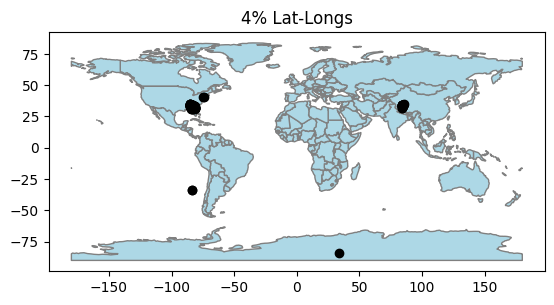

In [19]:
axis = world_data.plot(
    color ='lightblue', edgecolor = 'grey')
geo_df.plot(ax = axis, color = 'black')
plt.title('4% Lat-Longs')

## 2. Using Folium


In [20]:
import folium
import json
import geopandas as gpd

shapefile_file_path = '/content/drive/MyDrive/lihtc/states_map/ne_50m_admin_1_states_provinces.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_file_path)

# Save as GeoJSON
gdf.to_file('us-states.json', driver='GeoJSON')

# Load GeoJSON data for state borders
with open('us-states.json') as f:
    states_data = json.load(f)

In [21]:
georgia_json = '/content/drive/MyDrive/lihtc/georgia_province.json'
with open(georgia_json) as f:
    georgia_data = json.load(f)
len(georgia_data["features"])

1

In [22]:
# @title Create map for x year with points
from shapely.geometry.polygon import Polygon

def map_by_year(year_string):
  map = folium.Map(location=[33, -83],
               zoom_start=6,
               min_lat=min_lat,
               max_lat=max_lat,
               min_lon=min_lon,
               max_lon=max_lon)

  # Add markers for each coordinate
  for index, row in geo_df.iterrows():
      polygon = Polygon(georgia_data["features"][0]["geometry"]["coordinates"][0])
      if get_year_by_name(row['file_id']) == year_string and polygon.contains(row['geometry']):
        folium.Marker([row['Latitude'], row['Longitude']], popup=str(row['file_id'] + ' ' + row['Site Geo Coordinates'])
        ).add_to(map)

  folium.GeoJson(
    georgia_data,
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'black',  # fill color of the states
        'color': 'black',      # border color of the states
        'weight': 1            # border width of the states
    }
  ).add_to(map)

  return map._repr_html_()


In [25]:
from IPython.display import display, HTML

# Create a map centered at a specific location
min_lon, max_lon = 28, 36
min_lat, max_lat = -80, -86

map1_html = map_by_year("2015")
map2_html = map_by_year("2016")
map3_html = map_by_year("2018")
map4_html = map_by_year("2019")
map5_html = map_by_year("2020")
map6_html = map_by_year("2022")

# Define HTML template for quad layout
html_template = """
<div style="display:flex;">
    <div style="width:33.33%; height:50%; border: 1px solid black; text-align:center;">
        <h3>2015</h3>
        {}
    </div>
    <div style="width:33.33%; height:50%; border: 1px solid black; text-align:center;">
        <h3>2016</h3>
        {}
    </div>
    <div style="width:33.33%; height:50%; border: 1px solid black; text-align:center;">
        <h3>2018</h3>
        {}
    </div>
</div>
<div style="display:flex;">
    <div style="width:33.33%; height:50%; border: 1px solid black; text-align:center;">
        <h3>2019</h3>
        {}
    </div>
    <div style="width:33.33%; height:50%; border: 1px solid black; text-align:center;">
        <h3>2020</h3>
        {}
    </div>
    <div style="width:33.33%; height:50%; border: 1px solid black; text-align:center;">
        <h3>2022</h3>
        {}
    </div>
</div>
"""

# Combine HTML template with map HTML
six_map_html = html_template.format(map1_html, map2_html, map3_html, map4_html, map5_html, map6_html)

# Display the 6-map layout
display(HTML(six_map_html))

In [28]:
# @title map + airports

import folium
import json
import geopandas as gpd

shapefile_file_path = '/content/drive/MyDrive/lihtc/us_airports/ne_10m_airports.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_file_path)

# Save as GeoJSON
gdf.to_file('us-airports.json', driver='GeoJSON')

# Load GeoJSON data for state borders
with open('us-airports.json') as f:
    airports_geojson = json.load(f)

# Create a map centered at a specific location
min_lon, max_lon = 28, 36
min_lat, max_lat = -80, -86

m = folium.Map(location=[33, -83],
               zoom_start=7,
               min_lat=min_lat,
               max_lat=max_lat,
               min_lon=min_lon,
               max_lon=max_lon)

# Add markers for each coordinate
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=str(row['file_id'] + ' ' + row['Site Geo Coordinates'])).add_to(m)

airports = airports_geojson["features"]

for row in airports:
    folium.Marker(
        location=[row["geometry"]["coordinates"][1], row["geometry"]["coordinates"][0]],
        popup=row["properties"]["name_en"],
        icon=folium.Icon(icon='plane', prefix='fa', color='red')
    ).add_to(m)

folium.GeoJson(
    georgia_data,
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'black',  # fill color of the states
        'color': 'black',      # border color of the states
        'weight': 1            # border width of the states
    }
  ).add_to(m)

m

## 3. Using Online tools (https://mobisoftinfotech.com/tools/plot-multiple-points-on-map/)


In [ ]:
formatted_coordinates = ''
for index, row in df.iterrows():
    # Concatenate latitude and longitude values with a comma and a space
    formatted_coordinates += f"{row['Latitude']},{row['Longitude']},\n"

# Print the formatted coordinates
print(formatted_coordinates)

33.459332,-82.06387899999999,
30.756864,-81.57105,
33.781481,-84.476682,
34.0112790, -85.2622010,
34.0000,-85.2500,
33.9426185,-83.35890310000002,
33.755125,-84.375137,
33.03136111111111,85.01708333333333,
33.706266100,-84.145938400,
33.766510,-84.3723180,
33.76,-84.41,
33.711729,-84.293276,
32.111086,-81.251224,
33.712599,-84.329324,
31.443629, -83.49461,
33.44046,84.17583,
33.564521,-83.443596,
33.5192892,-84.35082520000003,
33.369305,-82.033066,
33.736298,-84.422318,
33.695538,-84.080058,
32.844518,-83.658692,
34.084563,84.677168,
33.608726,-84.446801,
33.912479,-84.832915,
34.276448,-85.233495,
33.949399,-83.771477,
33.97882,-83.938122,
33.725532,-84.387302,
33.05808,-83.21854,
32.96989,-82.8132,
33.551776,-84.283669,
33.55179,-84.284518,
33.434053,-84.135407,
33.434053,-84.134985,
32.048409,-81.171677,
34.283142,-83.862429,
33.3610342,-84.7838256,
32.892549,-84.307321,
33.365769,-82.041868,
33.747404,-84.49698,
33.787976,-84.160893,
33.785095 ,84.497975,
32.286504,-83.474614,
32.0